In [0]:
import pyspark
import time 
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
def preprocessing_google(graph):
    graph = graph.zipWithIndex().filter(lambda tup: tup[1] > 3).map(lambda tup: tup[0])
    graph = graph.map(lambda x: x.split('\t'))
    return graph

def preprocessing_twitter(graph):
    graph = graph.map(lambda x : (x.split(" ")[0],x.split(" ")[1]))
    return graph

def iterate(a):
    valueList=[]
    m = a[0]
    for value in a[1]:
        if value<m:
            m = value
        valueList+=[value]
    if m<a[0]:
        yield((a[0], m))
        for val in valueList:
            if m!=val:
                incr.add(1)
                yield((val, m))


def iterate_CCF(graph):
    while incr.value>0 :
        incr.value=0
        graph = graph.flatMap(lambda x : [(x[0], x[1]), (x[1], x[0])])
        graph = graph.groupByKey()
        graph = graph.map(lambda x : (x[0], list(x[1])))
        graph = graph.flatMap(iterate)
        graph = graph.map(lambda x : ((x[0], x[1]), 0))
        graph = graph.reduceByKey(lambda x,y : 0)
        graph = graph.map(lambda x: x[0])
    return graph
  
    
def plot_dist_nb_compo(output) :
    cc = output.map(lambda x: (x[1], x[0])).groupByKey().mapValues(list)
    cc = cc.map(lambda x: (len(x[1]), 1)) # key = CC size
    cc = cc.reduceByKey(lambda x,y: x+y) # value = CC count
    X = cc.map(lambda x: x[0]).collect()
    Y = cc.map(lambda x: x[1]).collect()

    plt.figure(figsize=(10,8))
    plt.plot(X, Y, 'rx')

    plt.xscale("log")
    plt.xlabel("Count")
    plt.xlim(left=1)  

    plt.yscale("log")
    plt.ylabel("Size")
    plt.ylim(bottom=1)  

    plt.title('Connected component size distribution')
    plt.grid(True)

In [0]:
incr = sc.accumulator(1)
graph = sc.parallelize([(1,2), (1,3), (4,5), (5,6), (4,6)])
output = iterate_CCF(graph)

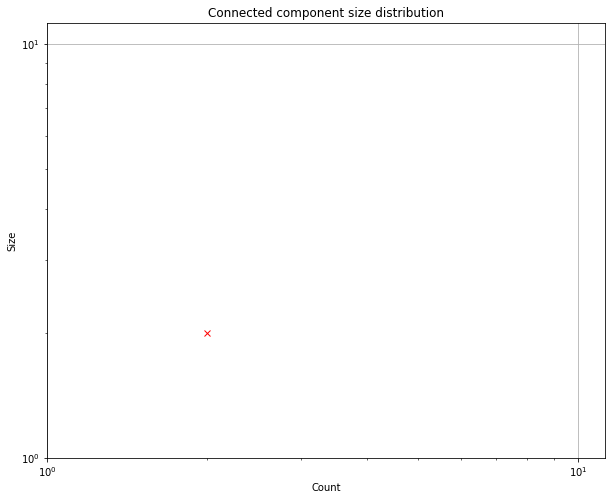

In [0]:
plot_dist_nb_compo(output)

Let's apply this to a small dataset

In [0]:
graph = sc.textFile("/FileStore/tables/facebook_combined.txt")
graph = preprocessing_twitter(graph)

In [0]:
output = iterate_CCF(graph)

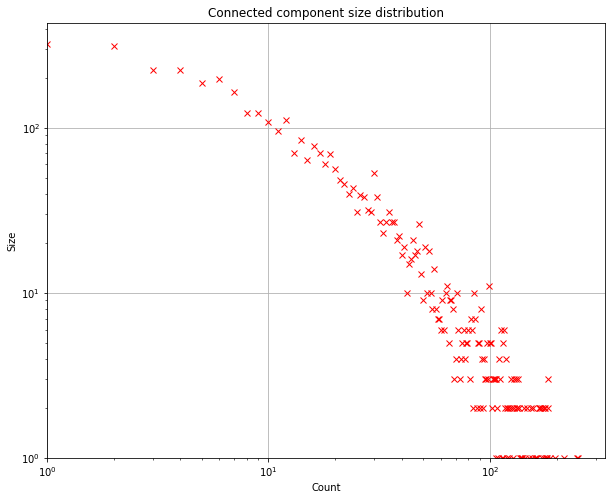

In [0]:
plot_dist_nb_compo(output)

In [0]:
print("total edges : ", graph.count())

total edges :  88234


Medium dataset

In [0]:
graph = sc.textFile("/FileStore/tables/twitter_combined.txt")
graph = preprocessing_twitter(graph)

In [0]:
output = iterate_CCF(graph)

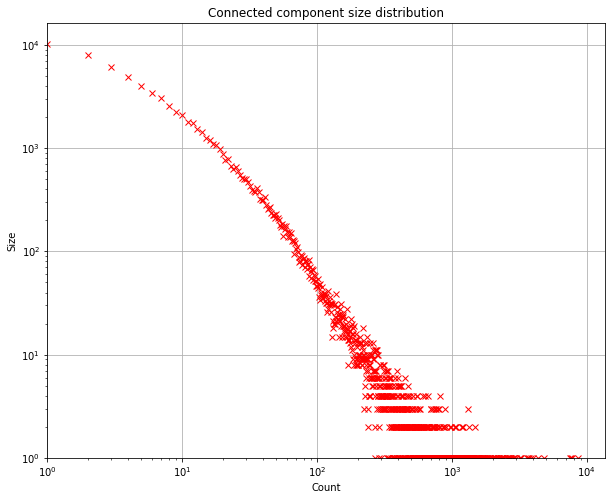

In [0]:
cc = output.map(lambda x: (x[1], x[0])).groupByKey().mapValues(list)
cc = cc.map(lambda x: (len(x[1]), 1)) # key = CC size
cc = cc.reduceByKey(lambda x,y: x+y) # value = CC count
X = cc.map(lambda x: x[0]).collect()
Y = cc.map(lambda x: x[1]).collect()


plt.figure(figsize=(10,8))
plt.plot(X, Y, 'rx')

plt.xscale("log")
plt.xlabel("Count")
plt.xlim(left=1)  

plt.yscale("log")
plt.ylabel("Size")
plt.ylim(bottom=1)  

plt.title('Connected component size distribution')
plt.grid(True)

In [0]:
print("total edges : ", graph.count())

total edges :  2420766


Let's apply this to a large dataset.

In [0]:
graph = sc.textFile("/FileStore/tables/web_Google.txt")
graph = preprocessing_google(graph)

In [0]:
output = iterate_CCF(graph)

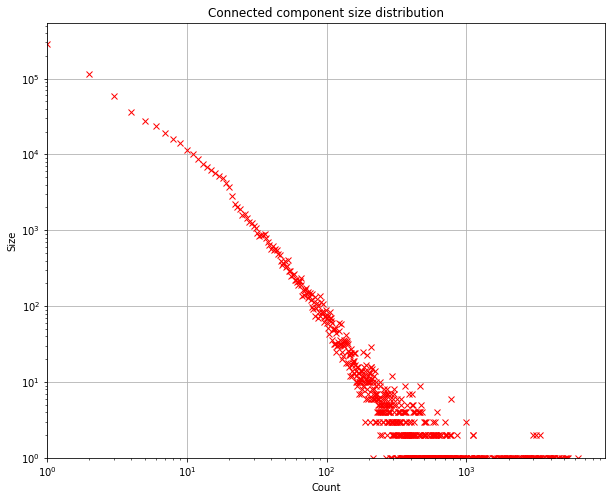

In [0]:
cc = output.map(lambda x: (x[1], x[0])).groupByKey().mapValues(list)
cc = cc.map(lambda x: (len(x[1]), 1)) # key = CC size
cc = cc.reduceByKey(lambda x,y: x+y) # value = CC count
X = cc.map(lambda x: x[0]).collect()
Y = cc.map(lambda x: x[1]).collect()


plt.figure(figsize=(10,8))
plt.plot(X, Y, 'rx')

plt.xscale("log")
plt.xlabel("Count")
plt.xlim(left=1)  

plt.yscale("log")
plt.ylabel("Size")
plt.ylim(bottom=1)  

plt.title('Connected component size distribution')
plt.grid(True)

In [0]:
print("total edges : ", graph.count())

total edges :  5105039
